<style>
  /* Responsive wrapper */
  .table-wrapper { width:100%; overflow-x:auto; -webkit-overflow-scrolling:touch; }
  /* Fixed-layout table */
  .table-wrapper table { width:100%; table-layout:fixed; border-collapse:collapse; }
  .table-wrapper th, .table-wrapper td { padding:0.3em; word-wrap:break-word; }
  /* Column widths if needed */
  /* Print rules */
  @media print {
    body { margin:0.5in; zoom:80%; }
    .table-wrapper { overflow-x:visible; }
    table { page-break-inside:avoid; size:landscape; }
  }
</style>


_<h1 style="text-align: center;">Noise Analysis: Part II</h1>_

<br>

<p style="text-align: center;">
<em>
Kyle O'Connell
</em>
</p>
<p style="text-align: center;">
<em>
MIDAC Corporation 
</em>
</p>
<p style="text-align: center;">
<em>
May 8, 2025
</em>
</p>


<br>

_<h3 style="text-align: center;">Abstract</h3>_

<br>

This report investigates how optical path length influences baseline noise and signal scaling in a purged, dual‐cell FTIR spectrometer by comparing $10m$ and $20m$ gas‐cell configurations. Absorbance random fluctuations (“noise”) were quantified as the standard deviation across replicate scans in five feature‐free regions of interest (ROIs) between $1800 cm^{-1}$ and $4000 cm^{-1}$. Doubling the path length produced a statistically significant rise in absolute noise of 36–79% across ROIs (p ≪ 0.001), while Beer–Lambert–predicted mean absorbance doubled. Consequently, although absolute signal‐to‐noise worsened, relative precision (coefficient of variation) improved, decreasing by roughly half at $20m$ due to the strong signal gain. Analyzing SNR as a function of path length revealed that the low-mid wavenumber ROI $1800 - 2200 cm^{-1}$ achieved maximal sensitivity, despite being compromised by residual gas absorption due to an incomplete purge. Whereas high frequency windows ($3800 - 4000 cm^{-1}$) exhibited greater absolute noise, they displayed white noise mechanism dominantion, as evidenced by statistically significant lower Coefficients of Variation. These results delineate the trade‐off between signal enhancement and baseline instability in long‐path FTIR measurements, and inform optimal path‐length selection and ROI placement for future high‐sensitivity spectroscopic applications.

<br>

_<h3 style="text-align: center;">Introduction & Methodology</h3>_

<br>

This report is a continuation of a previous Noise Analysis report. That report concluded with the understanding that the experimental setup was flawed. The decision to use a cell bypass for a shorter path length introduced too many confounding variables to be able to draw an accurate conclusion about the relationship between noise levels and path length in our I-Series FTIR Systems. This report aims to remedy that by direct comparison of noise levels in $5$ typically featureless regions with a $10$ meter and $20$ meter cell. The motivation behind such an investigation is to determine the best course of action for simulating our signal to noise ratios for, primarily, $NO$ vis-a-vis the EPA system with a Linear Stirling Cooler. The methodology for the experiment involves taking (purged) system data ($10$ samples at $256$ co-added scans) once with a $10m$ cell attached and then again with a $20m$ cell attached. The data is then comparatively analyzed using Essential FTIR software for noise levels in the absorbance spectrum in specific regions of interest which span the detector response. Descriptive statistics including $t$-tests and Coefficients of Variability, are utilized to quantitatively inform our conclusions.

<br>

<br>

<br>

_<h3 style="text-align: center;">Figures</h3>_

<br>

In this section I have included a representative absorbance spectrum for each data set

<br>

<center>
  
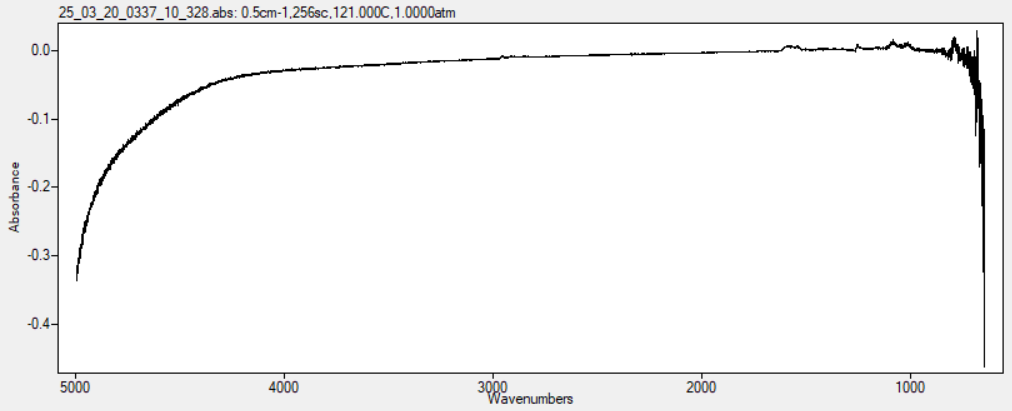  
<br>
<h5 style="text-align: center;"><strong>Fig. 1: 10m Cell Representative Absorbance Spectrum</strong></h5>

</center>

<br>

<center>
  
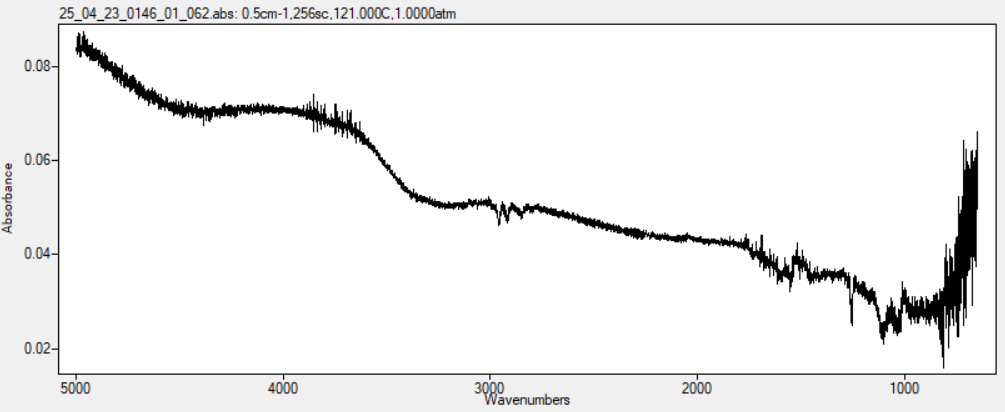  
<br>
<h5 style="text-align: center;"><strong>Fig. 2: 20m Cell Representative Absorbance Spectrum</strong></h5>

</center>


<br>

_<h3 style="text-align: center;">Analysis</h3>_

<br>

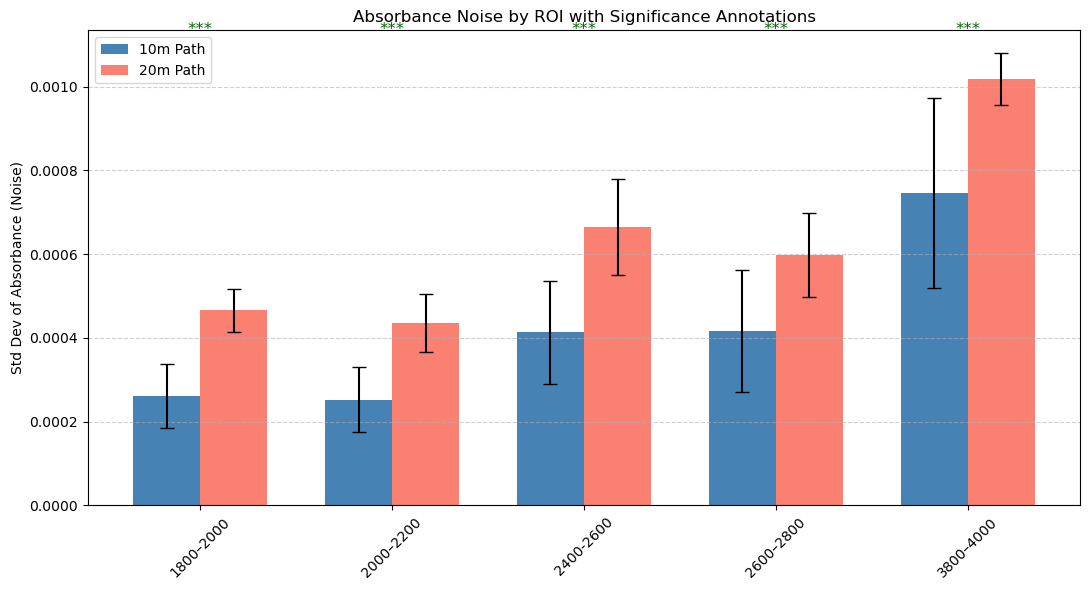

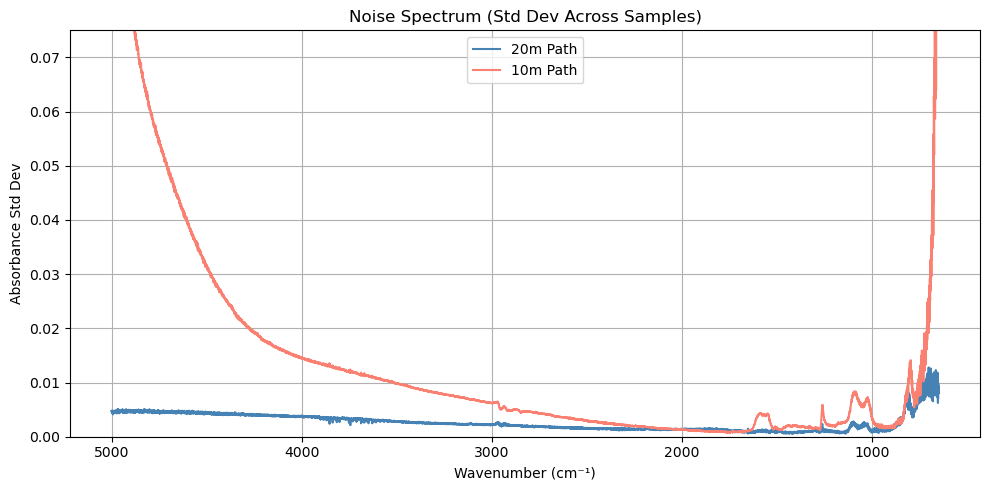


--- ROI Analysis Summary ---

ROI: 1800–2000
  Std Dev (20m)       : 0.000466
  Std Dev (10m)       : 0.000261
  % Increase in Noise : 78.71%
  Coeff. of Variation :
     - 20m            : 11.03%
     - 10m            : 28.90%
  p-value             : 0.000000000000010

ROI: 2000–2200
  Std Dev (20m)       : 0.000436
  Std Dev (10m)       : 0.000252
  % Increase in Noise : 73.28%
  Coeff. of Variation :
     - 20m            : 15.89%
     - 10m            : 30.85%
  p-value             : 0.000000000020984

ROI: 2400-2600
  Std Dev (20m)       : 0.000665
  Std Dev (10m)       : 0.000413
  % Increase in Noise : 60.81%
  Coeff. of Variation :
     - 20m            : 17.27%
     - 10m            : 29.78%
  p-value             : 0.000000002402916

ROI: 2600–2800
  Std Dev (20m)       : 0.000598
  Std Dev (10m)       : 0.000417
  % Increase in Noise : 43.36%
  Coeff. of Variation :
     - 20m            : 16.91%
     - 10m            : 34.92%
  p-value             : 0.000008137995714

ROI: 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.stats import ttest_ind
import glob

# === CONFIGURATION ===

# Define data folders
path_folder_10m = r"C:\Users\q\Documents\EFTIR\CSV Files\Long Path"
path_folder_20m = r"C:\Users\q\Documents\EFTIR\CSV Files\Longest Path"

# Regions of Interest
rois = {
    "1800–2000": (1800, 2000),
    "2000–2200": (2000, 2200),
    "2400-2600": (2400, 2600),
    "2600–2800": (2600, 2800),
    "3800–4000": (3800, 4000),
}

# === FUNCTIONS ===

def load_roi_std_data(folder_path):
    """Return ROI-wise list of std devs for each spectrum in a folder."""
    roi_std = {roi: [] for roi in rois}
    roi_mean = {roi: [] for roi in rois}
    
    for file in os.listdir(folder_path):
        df = pd.read_csv(os.path.join(folder_path, file))
        df.columns = df.columns.str.strip()
        wn_col = df.columns[0]
        ab_col = df.columns[1]
        
        for roi_name, (low, high) in rois.items():
            roi_data = df[(df[wn_col] >= low) & (df[wn_col] <= high)]
            absorbance = roi_data[ab_col]
            roi_std[roi_name].append(absorbance.std())
            roi_mean[roi_name].append(absorbance.mean())
                
    return roi_std, roi_mean

def compute_stats(roi_std, roi_mean):
    """Compute mean std dev, std dev of std devs, CV%, and mean baseline."""
    roi_stats = {}
    for roi in rois:
        stds = np.array(roi_std[roi])
        means = np.array(roi_mean[roi])
        mean_std = np.mean(stds)
        std_of_std = np.std(stds)
        cv_percent = (std_of_std / mean_std) * 100 if mean_std != 0 else 0
        roi_stats[roi] = {
            'mean_std': mean_std,
            'std_of_std': std_of_std,
            'cv_percent': cv_percent,
            'mean_baseline': np.mean(means)
        }
    return roi_stats

# === LOAD & COMPUTE ===

std_10m, mean_10m = load_roi_std_data(path_folder_10m)
std_20m, mean_20m = load_roi_std_data(path_folder_20m)

stats_10m = compute_stats(std_10m, mean_10m)
stats_20m = compute_stats(std_20m, mean_20m)

# === t-tests and Percent Increase ===

t_results = {}
percent_increase = {}

for roi in rois:
    vals_10m = std_10m[roi]
    vals_20m = std_20m[roi]
    t_stat, p_val = ttest_ind(vals_10m, vals_20m)
    t_results[roi] = p_val
    increase = (np.mean(vals_20m) - np.mean(vals_10m)) / np.mean(vals_10m) * 100
    percent_increase[roi] = increase

# === BAR PLOT with ERROR BARS AND ANNOTATIONS ===

x = np.arange(len(rois))
width = 0.35

means_20m = [stats_20m[roi]['mean_std'] for roi in rois]
errs_20m  = [stats_20m[roi]['std_of_std'] for roi in rois]

means_10m = [stats_10m[roi]['mean_std'] for roi in rois]
errs_10m  = [stats_10m[roi]['std_of_std'] for roi in rois]

roi_labels = list(rois.keys())

fig, ax = plt.subplots(figsize=(11, 6))

ax.bar(x - width/2, means_10m, width, yerr=errs_10m, capsize=5,
       label='10m Path', color='steelblue')
ax.bar(x + width/2, means_20m, width, yerr=errs_20m, capsize=5,
       label='20m Path', color='salmon')

# Annotate with stars for significance
for i, roi in enumerate(rois):
    p_val = t_results[roi]
    if p_val < 0.001:
        star = '***'
    elif p_val < 0.01:
        star = '**'
    elif p_val < 0.05:
        star = '*'
    else:
        star = ''
    if star:
        y = max(means_20m[i] + errs_20m[i], means_10m[i] + errs_10m[i]) + 0.001
        ax.text(x[i], 0.001125, star, ha='center', fontsize=12, color='darkgreen')

ax.set_ylabel("Std Dev of Absorbance (Noise)")
ax.set_title("Absorbance Noise by ROI with Significance Annotations")
ax.set_xticks(x)
ax.set_xticklabels(roi_labels, rotation=45)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# === NOISE TRACE PLOT ===

def compute_noise_trace(folder):
    """Returns mean noise spectrum (std dev at each wavenumber)."""
    spectra = []
    for file in glob.glob(os.path.join(folder, "*.csv")):
        df = pd.read_csv(file)
        absorbance = df.iloc[:, 1].values
        spectra.append(absorbance)
    spectra = np.array(spectra)
    noise = np.std(spectra, axis=0)
    wavenumbers = df.iloc[:, 0].values
    return wavenumbers, noise

wn_20m, noise_20m = compute_noise_trace(path_folder_20m)
wn_10m, noise_10m = compute_noise_trace(path_folder_10m)

plt.figure(figsize=(10, 5))
plt.plot(wn_20m, noise_20m, label='20m Path', color='steelblue')
plt.plot(wn_10m, noise_10m, label='10m Path', color='salmon')
plt.gca().invert_xaxis()
plt.title("Noise Spectrum (Std Dev Across Samples)")
plt.xlabel("Wavenumber (cm⁻¹)")
plt.ylabel("Absorbance Std Dev")
plt.legend()
plt.grid(True)

plt.ylim(0, 0.075)

plt.tight_layout()
plt.show()

# === PRINT SUMMARY TABLE ===

print("\n--- ROI Analysis Summary ---")
for roi in rois:
    print(f"\nROI: {roi}")
    print(f"  Std Dev (20m)       : {stats_20m[roi]['mean_std']:.6f}")
    print(f"  Std Dev (10m)       : {stats_10m[roi]['mean_std']:.6f}")
    print(f"  % Increase in Noise : {percent_increase[roi]:.2f}%")
    print(f"  Coeff. of Variation :")
    print(f"     - 20m            : {stats_20m[roi]['cv_percent']:.2f}%")
    print(f"     - 10m            : {stats_10m[roi]['cv_percent']:.2f}%")
    print(f"  p-value             : {t_results[roi]:.15f}")


<h1 style="text-align: center;">Results</h1>

This report has evaluated baseline-region noise in $5$ $200cm^{-1}$-wide Regions of Interest spanning $1400-4000cm^{-1}$ for both $10m$ and $20m$ path length configurations. For each ROI, the __standard deviation of the absorbance across repeated scans (the noise) increased significantly when the path length doubled__. The detailed metrics are summarized in the table below:

<br>

$$
\begin{array}{|l|c|c|c|c|}
\hline
\textbf{ROI}         & \textbf{Std Dev (20m)} & \textbf{CV (20m)} & \textbf{Std Dev (10m)} & \textbf{CV (10m)} & \textbf{Increase} & \textbf{p-value} \\
\hline
1800–2000            & 0.000466      & 11.0\%         & 0.000261       & 28.9\%        & 78.71\%              & 1.0e-14         \\
2000–2200            & 0.000436      & 15.9\%         & 0.000252       & 30.9\%        & 73.28\%              & 2.1e-11         \\
2400–2600            & 0.000665      & 17.3\%         & 0.000413       & 29.8\%        & 60.81\%              & 2.4e-9          \\
2600–2800            & 0.000598      & 16.9\%         & 0.000417       & 34.9\%        & 43.36\%              & 8.1e-6          \\
3800–4000            & 0.001018      & 6.1\%          & 0.000746       & 30.5\%        & 36.52\%              & 8.4e-7          \\
\hline
\end{array}
$$

<br>

<br>

<br>

__Absolute Noise__: Across all regions, 
- The $20m$ cell shows noise levels: $4 \times 10^{-4} \lt N_{20m} (AU) \lt 10^{-3}$
- The $10m$ cell shows noise levels: $3 \times 10^{-4} \lt N_{10m} (AU) \lt 7 \times 10^{-4}$

__Relative Noise Increase__: Doubling the path length increases noise by $36-79\%$ per wavenumber

__Statistical Significance__: All $p$-values are well below $10^{-3}$
- This indicates the observed noise increases are highly unlikely to result from random variation

__Coefficient of Variation Behavior__: Despite higher absolute noise, the $CV\%$ drops at $20m$ in every ROI, indicating the baseline absorbance grows faster (via Beers law) than it's fluctuation amplitude. As a reminder: $$\begin{align} & A = \epsilon c \ell \tag{1} \\ & CV = \frac{\sigma}{\mu} \times 100\% \tag{2} \end{align}$$

<br>

<h1 style="text-align: center;">Conclusions</h1>

<br>

__Path Length vs Noise Trade-Off__: As expected from Beers law, doubling the optical path length enhances absorbance signals but also amplifies baseline fluctuations (e.g., residual gas absorption, drift, thermal/mechanical fluctuations) resulting in a net noise increase of $36-79\%$ in "quiet" spectral windows

__Optimal ROI Selection__: Of all the tested regions, $1800-2000$ and $2000-2200$ record the smallest absolute noise levels as well as the smallest relative increases in noise when increasing path length. Suggesting these windows are ideal for quantifying weak features in long-path length measurements
- In addition, looking at the $CV\%$ values for each region we note that the $CV\%$ values are relatively high in the low-mid frequency regions, suggesting residual gas absorption and thus, artifacts due to incomplete purge remain. The relatively smaller $CV\%$ value of the high wavenumber region suggest this window is dominated by instrument/detector noise rather than residual gas absorption
- This notion is corroborated by looking at the spectra

$\therefore$ Given a more complete purge we might see even lower absolute noise values in the low-mid IR regions

__Summary__: These results validate, and quantify, the noise/pathlength relationship and pinpoint the best regions for true instrument noise characterization in both $10$ and $20$ meter configurations. The statistical analysis, along with inspection of the spectra, confirm that while our results are not the product of inherent random variation and, as a result, are reproducible, they are also degraded by an incomplete purge protocol

<br>

<h1 style="text-align: center;">Recommendations & Experimental Iteration</h1>

<br>

In order to more robustly quantify the noise/pathlength relationship, including decoupling pure signal enhancement from baseline drift effects and determining the optimal path length the experimental setup will need to be modified in the following ways:

1. Take $n \geq m \in \mathbb{Z}$ replicate spectra for a number of path lengths $\ell$, randomizing and alternating $k \lt n$ replicates for each path length until $k \geq m$, to reduce systematic drift bias$^{1}$
    - Ensure the purge is complete and robust, ideally by monitoring a "clean" water band until its absorbance drift $\lt 1 \times 10^{-4} AU$ before starting true acquisition$^2$
    - Before and after each block of $k$ replicate spectra, run a background scan to track baseline drift. Subtract interpolated background from your sample spectra to remove low-frequency noise$^3$
        1. Choose a clean ROI and track the mean absorbance over consecutive background scans
        2. Graph mean absorbance vs scan number; a sloped line signifies drift, random variance around zero indicates stability$^4$
        3. Ensure drift is below an agreed-upon threshold (e.g., $10^{-4}$)
2. Fit $A(\ell)$ to a linear model: This verifies Beers law is upheld and our data provenance is robust
    - Since a plot of $A$ vs. $\ell$ should be a straight line through the origin with slope $\epsilon c \ ^5$
        - The slope then gives the product of the molar absorptivity $\epsilon$ and the analyte concentration $c$
    - Deviations from linearity (e.g., curvature or intercept-offset) flag departures from ideality - such as stray scattering, cell-window reflections or saturation at high absorbance$^6$
    - Quantifying the goodness of fit with $R^2$: A high $R^2$ value, ideally $R^2 \approx 1.00$, verifies the absorbance scales linearly with path length and validates our optical alignment assumptions$^4$
3. Fit $\sigma(A)$ vs $\ell$ to a polynomial model: This determines the scaling factor for our noise and elucidates the nature of the dominant noise mechanism
    - _Empirical Scaling Laws_:
        1. White-noise limited regime: $\sigma \propto \sqrt{(\ell)}$ if detector shot noise or thermal/mechanical fluctuations dominate$^7$
        2. Drift limited regime: $\sigma \propto \ell^{\alpha}$ (With $\alpha \approx 1$) if baseline fluctuations, purge variability or thermal drift dominate$^7$
    - _Fitting Procedure_:
        1. Plot $\log(\sigma)$ vs. $\log(\ell)$
        2. Fit a straight line: $$\log(\sigma) = \alpha \log(\ell) + \beta \rightarrow \sigma = 10^{\beta}\ell^{\alpha} \tag{3}$$
        3. The exponent $\alpha$ reveals the dominant noise mechanism$^7$
    - _Variations_: There are $2$ variations to this procedure depending on requirements for interpretation:
        1. ROI Specific Curves: For each ROI, plot it's measured $\sigma_{ROI}$ at each path length $\ell$ to end up with one curve per ROI on the same $\log-\log$ axes. This reveals how each ROI's noise scales with the environmental factors
        2. Aggregate Noise Curve: Compute a single noise metric as the mean of all ROI specific noise values, as: $$\langle \sigma \rangle(\ell) = \sum\limits_{i=1}^N \sigma_i(\ell) \tag{4}$$ Then plot $(\ell, \langle \sigma \rangle)$. This provides a simple overall view of how the system behaves with path length.
        3. Both Methods can be used in concert to give a holistic, yet granular understanding of the systematic noise behavior
4. Plot $SNR(\ell) = \frac{\langle A \rangle}{\sigma}$ to find the optimal path length for maximal sensitivity.
    - Recall: $$SNR(\ell) = \frac{\mu(\ell)}{\sigma(\ell)} \propto \frac{\ell}{\ell^{\alpha}} = \ell^{1-\alpha} \tag{5}$$
        - If $\alpha \lt 1$, SNR _increases_ with path length (signal grows faster than noise) - longer cells improve sensitivity
        - If $\alpha \approx 1$, SNR is roughly constant - path length choice is a matter of convenience
        - If $\alpha \gt 1$, SNR _decreases_ with path length (noise outpaces signal) - shorter cells are better
    - Finding the optimum:
        1. Compute $SNR(\ell)$ for each path length from your data
        2. Plot $(\ell, SNR)$ and look for the maximum

By carrying out these $3$ fits - Linear Absorbance, Power-Law Noise and SNR Profiling - we will fully characterize how both the signal and baseline fluctuations scale with optical path length, and thus choose the path that maximizes our systems analytical performance.

<br>

<h1 style="text-align: center;">References</h1>

<br>

1. https://www.govinfo.gov/content/pkg/FR-2016-08-30/pdf/2016-19642.pdf
2. https://www.parker.com/content/dam/Parker-com/Literature/IGFG/PDF-Files/Effect_of_Purging_FTIR_Spectrometer.pdf
3. Martens, Harald & Bruun, Susanne & Adt, Isabelle & Sockalingum, Ganesh & Kohler, Achim. (2006). Pre-processing in biochemometrics: Correction for path-length and temperature effects of water in FTIR bio-spectroscopy by EMSC. Journal of Chemometrics. 20. 402 - 417. 10.1002/cem.1015.
4. Anaëlle Paredes-Nunez, Imen Jbir, Daniel Bianchi, Frederic C. Meunier,
Spectrum baseline artefacts and correction of gas-phase species signal during diffuse reflectance FT-IR analyses of catalysts at variable temperatures,
Applied Catalysis A: General,
Volume 495,2015,Pages 17-22,ISSN 0926-860X,https://doi.org/10.1016/j.apcata.2015.01.042.(https://www.sciencedirect.com/science/article/pii/S0926860X15000708)
5. https://www.edinst.com/resource/the-beer-lambert-law
6. https://www.spectroscopyonline.com/view/understanding-the-limits-of-the-bouguer-beer-lambert-law
7. Werle P, Slemr F. Signal-to-noise ratio analysis in laser absorption spectrometers using optical multipass cells. Appl Opt. 1991 Feb 1;30(4):430-4. doi: 10.1364/AO.30.000430. PMID: 20582010.